# Большое практическое задание 1
# Классификация изображений цифр метрическими методами

## курс "Машинное обучение 1", программа OzonMasters, 2021

## Студент: <Сазон Никита Сергеевич>

## Введение

Данное задание направлено на ознакомление с метрическими алгоритмами классификации, а также методами работы с изображениями. В задании вам будет необходимо:

1. Написать на языке Python собственные реализации метода ближайших соседей и кросс-валидации. Реализации должны соответствовать спецификации, описанной в прилагающихся модулях.     
    Частично проверить правильность выполнения своих реализаций можно с помощью системы ejudge в соответствующем соревновании.
    **Внимание.** Прохождение всех тестов в соревновании не гарантирует правильность решения.


2. Провести описанные ниже эксперименты с датасетом изображений цифр MNIST, описать полученые результаты и ответить на предложенные вопросы.


3. Подготовить отчёт о проделанной работе. Удалите черновые выводы, оставьте только тот код, который является ответом к пунктам задания. Сохраните ноутбук в форматах .ipynb и .html одновременно.

    **Замечание.** Чтобы экспорировать jupyter notebook в .html нужно выбрать:
    `File -> Download as -> HTML (.html).`
    Для экспорта notebook в .html в Google Colab, воспользуйтесь [следующим кодом](https://gist.github.com/vbugaevskii/b9c6181f2ad83e11f5b9c92d315cb2de).
Большая просьба: подписывайте свой отчет (в названии файла и внутри ноутбука).


4. В систему проверки необходимо сдать отчёт в обоих форматах и .zip архив с написанными модулями.

    Большая просьба: jupyter notebook и html файл не запаковывать в архив, а сдавать отдельно.

### Некоторые полезные советы

1. Для того, чтобы не перезагружать jupyter notebook каждый раз после того, как вы внесли изменения в модуль `knn`, можно добавить ячейку с таким содержимым:
     
```
    %load_ext autoreload
    
    %autoreload 2
```
   
2. Не нужно копировать свой код из модулей в jupyter notebook, пользуйтесь им, как если бы это была библиотека. Для этого поместите директорию `knn` рядом с notebook-ом. Пример, как может выглядеть содержимое вашей рабочей директории:

```
    tree
    ---knn
    ------__init__.py
    ------classification.py
    ------distances.py
    ------model_selection.py
    ------nearest_neighbors.py
    ---tests
    ------__init__.py
    ------test_classification.py
    ------test_distances.py
    ------test_model_selection.py
    ------test_nearest_neigbours.py
    experiments.ipynb
```

## Реализация алгоритмов (10 баллов)

Прототипы функций должны строго соответствовать прототипам, описанным в спецификации и проходить
все выданные тесты. Задание, не проходящее все выданные тесты, приравнивается к невыполненному. При
написании **необходимо пользоваться** стандартными средствами языка Python и библиотекой numpy. Библиотеками scipy и scikit-learn пользоваться **запрещено**, если это не обговорено отдельно в пункте задания. Для
экспериментов в бонусной части разрешается пользоваться любыми открытыми библиотеками, реализующими
алгоритмы обработки изображений.

Среди предоставленных файлов должны быть следующие модули и функции в них

1. Модуль `knn.distances` с реализацией функции для вычисления расстояния:
    1. `euclidean_distance(X, Y)` — реализация евклидова расстояния с заданными свойствами;
    2. `cosine_distance(X, Y)` — реализация косинусного расстояния с заданными свойствами;


2. Модуль `knn.nearest_neighbors`, содержащий собственную реализацию поиска ближайших соседей.
    
    Класс `NearestNeighborsFinder` с методами:
      1. `__init__(self, n_neighbors, metric="euclidean")` — конструктор (инициализатор) класса;
      2. `fit(self, X, y=None)` — обучение алгоритма;
      3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей.


3. Модуль `knn.classification`, содержащий собственную реализацию классификатора на основе метода ближайших соседей.

    Класс `KNNClassifier` с методами:
    
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’)` — конструктор (инициализатор) класса;
    2. `fit(self, X, y=None)` — обучение алгоритма;
    3. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей;
    4. `predict(self, X)` — редсказание на новых данных;
    5. `_predict_precomputed(self, indices, distances)` — вспомогательный метод.
    
   Класс `BatchedKNNClassifier`, полезный для работы с большими выборками, с методами:
   
    1. `__init__(self, n_neighbors, algorithm=’my_own’, metric=’euclidean’, weights=’uniform’, batch_size=None)` — конструктор (инициализатор) класса
    2. `kneighbors(self, X, return_distance=False)` — поиск ближайших соседей, разбитый на несколько итераций по батчам
    3. `set_batch_size(self, batch_size)` — метод для выставления нового значения размера батча


4. Модуль `knn.model_selection` с реализациями функций для применения кросс-валидации:

    1. `knn_cross_val_score(X, y, k_list, scoring, cv=None, **kwargs)` — функция для измерения качества на кросс-валидации.

Ожидается, что реализациия всех классов и функций будет максимально эффективной. Дополнительно вам предоставлены открытые unit-тесты, которые находятся рядом с модулем `knn` в директории `tests` Чтобы запустить тесты в консоли требуется выполнить одну из команд:


```
$ python -m unittest                            # запуск всех тестов
$ python -m unittest tests/test_distances.py    # запуск конкретных тестов
```

## Эксперименты (15 баллов)

Здесь вы можете заимпортировать всё, что вам потребуется для экспериментов:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as sk
from sklearn.model_selection import train_test_split
import pandas as pd

from knn.distances import euclidean_distance, cosine_distance 
from knn.classification import BatchedKNNClassifier
from knn.model_selection import knn_cross_val_score
from sklearn.model_selection import KFold

### 1. Загрузка даннных

Эксперименты этого задания необходимо проводить на датасете MNIST. Загрузить датасет можно при помощи функции `sklearn.datasets.fetch_openml("mnist_784")` или скачать вручную с сайта
http://yann.lecun.com/exdb/mnist/. Датасет необходимо разбить на обучающую выборку (первые 60 тыс.
объектов) и тестовую выборку (10 тыс. последних объектов).

In [4]:
data = sk.fetch_openml("mnist_784")

In [5]:
X = pd.DataFrame(data.data)
Y = data.target

### 2. Исследование скорости методов поиска (4 балла)

Исследуйте, какой алгоритм поиска ближайших соседей будет быстрее работать в различных ситуациях.

Измерьте для каждого алгоритма поиска (`kd_tree`, `ball_tree`, `brute` и `my_own`) время нахождения 5 ближайших соседей для каждого объекта тестовой выборки по евклидовой метрике. Выберите подмножество признаков, по которому будет считаться расстояние, размера 10, 20, 100 (подмножество признаков выбирается один раз для всех объектов, случайно).

**Замечание.** Для оценки времени долго работающих функций можно пользоваться либо функциями из
модуля time, либо magic-командой %time, которая запускает код лишь один раз.

### Подмножество признаков размера 10

In [8]:
%%time
X_with_10_features = X.sample(n=10, axis='columns', replace=True)
knn_classifier_using_kd_tree = BatchedKNNClassifier(5, 'kd_tree', 'euclidean', batch_size = 5)
knn_classifier_using_ball_tree = BatchedKNNClassifier(5, 'ball_tree', 'euclidean', batch_size = 5)
knn_classifier_using_brute = BatchedKNNClassifier(5, 'brute', 'euclidean', batch_size = 5)
knn_classifier_using_my_own = BatchedKNNClassifier(5, 'my_own', 'euclidean', batch_size = 5)

Wall time: 997 µs


### kd_tree

In [12]:
knn_classifier_using_kd_tree.fit(X_train, y_train)
knn_classifier_using_kd_tree.kneighbors(X_test)

Wall time: 15.5 s


E:\anaconda1\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


array([[ 3318,  6365,  5606,  2029,  6450],
       [ 3392,  6449,  1849,  2881,   390],
       [  585,   818,  1381,  1962,  4260],
       ...,
       [58375, 55623, 34835, 37185, 42166],
       [47097,  5802, 30330, 33678, 13563],
       [27421, 18016, 11189,  6390, 44604]], dtype=int64)

### ball_tree

In [15]:
%%time
knn_classifier_using_ball_tree.fit(X_train, y_train)
knn_classifier_using_ball_tree.kneighbors(X_test)

Wall time: 14.9 s


E:\anaconda1\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


array([[ 3318,  6365,  5606,  2029,  6450],
       [ 3392,  6449,  1849,  2881,   390],
       [  585,   818,  1381,  1962,  4260],
       ...,
       [58375, 55623, 34835, 37185, 42166],
       [47097,  5802, 30330, 33678, 13563],
       [27421, 18016, 11189,  6390, 44604]], dtype=int64)

### brute

In [14]:
%%time
knn_classifier_using_brute.fit(X_train, y_train)
knn_classifier_using_brute.kneighbors(X_test)

Wall time: 21 s


E:\anaconda1\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


array([[33619,  2029, 33297, 41616,  6365],
       [ 1849, 15163, 17288, 29546,  3392],
       [43497, 27692, 28251, 39256, 20707],
       ...,
       [58375, 55623, 34835, 37185, 42166],
       [47097,  5802, 30330, 33678, 13563],
       [27421, 18016, 11189,  6390, 44604]], dtype=int64)

### my_own

In [13]:
%%time
knn_classifier_using_my_own.fit(np.asarray(X_train), np.asarray(y_train))
knn_classifier_using_my_own.kneighbors(np.asarray(X_test))

Wall time: 32 s


array([[33619,  2029, 33297, 41616,  6365],
       [ 1849, 15163, 17288, 29546,  3392],
       [28251, 39256, 27692, 43497, 20707],
       ...,
       [58375, 55623, 34835, 37185, 42166],
       [47097,  5802, 30330, 33678, 13563],
       [27421, 18016, 11189,  6390, 44604]], dtype=int64)

### Подмножество признаков размера 20

In [16]:
X_with_20_features = X.sample(n=20, axis='columns', replace=True)
X_train, X_test, y_train, y_test = train_test_split(X_with_20_features, Y, test_size = 0.16, random_state = 1)

### kd_tree

In [17]:
%%time
knn_classifier_using_kd_tree.fit(X_train, y_train)
knn_classifier_using_kd_tree.kneighbors(X_test)

Wall time: 26.3 s


E:\anaconda1\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


array([[21684, 52046, 26630, 56764, 18828],
       [54081, 18995, 56404, 54945, 45659],
       [24992, 27848, 46310,  2564, 53431],
       ...,
       [  386, 15474,  7817, 21897, 48076],
       [23723, 12925, 54017, 30095, 30467],
       [44249, 12411, 54526, 11384, 35558]], dtype=int64)

### ball_tree 

In [18]:
%%time
knn_classifier_using_ball_tree.fit(X_train, y_train)
knn_classifier_using_ball_tree.kneighbors(X_test)

Wall time: 46 s


E:\anaconda1\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


array([[21684, 52046, 26630, 56764, 18828],
       [54081, 18995, 56404, 54945, 45659],
       [24992, 27848, 46310,  2564, 53431],
       ...,
       [  386, 15474,  7817, 21897, 48076],
       [23723, 54017, 12925, 30095, 30467],
       [44249, 12411, 54526, 11384, 35558]], dtype=int64)

### brute 

In [19]:
%%time
knn_classifier_using_brute.fit(X_train, y_train)
knn_classifier_using_brute.kneighbors(X_test)

Wall time: 26.3 s


E:\anaconda1\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


array([[21684, 52046, 26630, 56764, 18828],
       [54081, 18995, 56404, 54945, 45659],
       [24992, 27848, 46310,  2564, 53431],
       ...,
       [  386, 15474,  7817, 21897, 48076],
       [23723, 12925, 54017, 30095, 30467],
       [44249, 12411, 54526, 11384, 35558]], dtype=int64)

### my_own 

In [20]:
%%time
knn_classifier_using_my_own.fit(np.asarray(X_train), np.asarray(y_train))
knn_classifier_using_my_own.kneighbors(np.asarray(X_test))

Wall time: 39.6 s


array([[21684, 52046, 26630, 56764, 18828],
       [54081, 18995, 56404, 54945, 45659],
       [24992, 27848, 46310,  2564, 53431],
       ...,
       [  386, 15474,  7817, 21897, 48076],
       [23723, 12925, 54017, 30095, 30467],
       [44249, 12411, 54526, 11384, 35558]], dtype=int64)

### Подмножество признаков размера 100

In [23]:
X_with_100_features = X.sample(n=100, axis='columns', replace=True)
X_train, X_test, y_train, y_test = train_test_split(X_with_100_features, Y, test_size = 0.16, random_state = 1)

### kd_tree

In [24]:
%%time
knn_classifier_using_kd_tree.fit(X_train, y_train)
knn_classifier_using_kd_tree.kneighbors(X_test)

Wall time: 2min 19s


E:\anaconda1\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


array([[10407,  2009,  6356,  2365, 31110],
       [16728, 10580, 19385, 58404, 56642],
       [28712, 36805, 41700, 49419, 18358],
       ...,
       [ 7931, 56819, 24583,  6958, 21569],
       [21763, 54061, 21991,  7832, 46643],
       [ 3898, 25709, 15895, 44585, 54962]], dtype=int64)

### ball_tree 

In [25]:
%%time
knn_classifier_using_ball_tree.fit(X_train, y_train)
knn_classifier_using_ball_tree.kneighbors(X_test)

Wall time: 2min 53s


E:\anaconda1\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


array([[10407,  2009,  6356,  2365, 31110],
       [16728, 10580, 19385, 58404, 56642],
       [28712, 36805, 41700, 49419, 18358],
       ...,
       [ 7931, 56819, 24583,  6958, 21569],
       [21763, 54061, 21991,  7832, 46643],
       [ 3898, 25709, 15895, 44585, 54962]], dtype=int64)

### brute 

In [26]:
%%time
knn_classifier_using_brute.fit(X_train, y_train)
knn_classifier_using_brute.kneighbors(X_test)

Wall time: 1min 1s


E:\anaconda1\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


array([[10407,  2009,  6356,  2365, 31110],
       [16728, 10580, 19385, 58404, 56642],
       [28712, 36805, 41700, 49419, 18358],
       ...,
       [ 7931, 56819, 24583,  6958, 21569],
       [21763, 54061, 21991,  7832, 46643],
       [ 3898, 25709, 15895, 44585, 54962]], dtype=int64)

### my_own 

In [27]:
%%time
knn_classifier_using_my_own.fit(np.asarray(X_train), np.asarray(y_train))
knn_classifier_using_my_own.kneighbors(np.asarray(X_test))

Wall time: 1min 38s


array([[10407,  2009,  6356,  2365, 31110],
       [16728, 10580, 19385, 58404, 56642],
       [28712, 36805, 41700, 49419, 18358],
       ...,
       [ 7931, 56819, 24583,  6958, 21569],
       [21763, 54061, 21991,  7832, 46643],
       [ 3898, 25709, 15895, 44585, 54962]], dtype=int64)

#### Приведите график / таблицу с результатами вашего эксперимента

In [31]:
tabledata = [[10, "15.5 s", "14.9 s", "21 s ", "39 s "],
          [20, "26.3 s", "46 s", "26.3 s ", "39.6 s "],
          [100, "2 min 19 s ", "2 min 53 s ", "1 min 1 s ", "1 min 38 s"]]

pd.DataFrame(tabledata, columns=["Число признаков", "kd_tree", "ball_tree", "brute", "my_own"])

,Число признаков,kd_tree,ball_tree,brute,my_own
0,10,15.5 s,14.9 s,21 s,39 s
1,20,26.3 s,46 s,26.3 s,39.6 s
2,100,2 min 19 s,2 min 53 s,1 min 1 s,1 min 38 s


![title](dinamic.png) 

#### Ответьте на следующие вопросы

1. Какой алгоритм сработал быстрее всего для каждого из размера подвыборок? Ожидали ли вы такие результаты до проведения эксперимента?

   Для подвыборки размера 10 быстрее всего сработал алгоритм "ball_tree";
   
   Для подвыборки размера 20 быстрее всего сработали алгоритмы "kd_tree" и "brute";
   
   Для подвыборки размера 100 быстрее всего сработал алгоритм "brute";
   
   Результат получился неожиданным.

2. Приведите теоретическую сложность каждого из алгоритмов поиска. Согласуется ли время работы алгоритмов на практике с их теоретической вычислительной сложностью? Как вы думаете, почему?

   Алгоритм my_own/brute для каждого пришедшего объекта считает расстояние до всех объектов обучающей выборки. Таким образом, если обучающая выборка состоит из n объектов, а тестовая - из m объектов, то сложность будет O(m*n).
   
   Алгоритм kd-tree выбирает случайные оси, считает по ним медианы и отбрасывает те части обучающей выборки, которые находятся по другую сторону от меданы относительно прешедшего объекта. Таким образом, если обучающая выборка состоит из n объектов, а тестовая - из m объектов, то сложность будет O(m*log(n)).
   
   Алгоритм ball-tree может быть по-разному реализован, но самая популярная реализация так же, как и kd-tree, делит выборку на равные части, только теперь они представляют собой не гиперкубы, а гиперсферы. Здесь можно взять ту же сложность O(m*log(n)).
   
   Время работы алгоритмов на практике не согласуется с теоретической вычислительной сложностью. Это может быть связано с конкретным датасетом - так, kd-tree хорошо использовать с однородными данными, так как близкие точки не будут при разбиениях попадать в разные гиперкубы, а ball-tree хорош, если данные "кучкуются" в нескольких однородных областях. Таким образом, для озознанного выбора алгоритма нужно провести анализ конкретного датасета. Следует также отметить, что алгоритмы kd-tree и ball-tree делают прогноз быстрее, но на этапе обучения они должны создать соответствующую структуру данных. Сложность этой операции зависит от размерности пространства признаков и числа объектов обучающей выборки, то есть что-то вроде O(d*n*Log(n)), где d - число признаков. Плюсом же является то, что ball-tree и kd-tree не чувствительны к d на этапе прогноза, так как пока мы не достигнем нужного разбиения, не производится никаких вычислений - это даёт им ещё большее преимущество при прогнозе относительно brute/my_own. Однако, если задача подразумевает постоянное обучение на новых данных, то создание структур данных на этапе обучения может сильно затруднить использование kd-tree и bal-tree. Эффективность "brute" относительно "my_own" можно обусловить более эффективной реализацией в стандартной библиотеке.

3. Какой алгоритм исходя из результатов эксперимента следует использовать в дальнейшем? Выберите алгоритм поиска соседей, который вы будете использовать во всех экспериментах ниже. 

    Я буду использовать алгоритм brute, потому что он показал хорошую динамику с росотом размерности пространства признаков (в дальнейших тестах я планирую использовать всё пространство признаков для прогноза/кросс валидации)

### 3. Исследование зависимости точности алгоритма на кросс-валидации (4 балла)


Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) алгоритма k ближайших соседей в зависимости от следующих факторов:
* количество соседей k от 1 до 10
* используется евклидова или косинусная метрика

In [15]:
from statistics import mean

Y = pd.to_numeric(Y)
euclidean = knn_cross_val_score(np.asarray(X), Y, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'accuracy', KFold(n_splits=3), algorithm = 'brute', metric='euclidean', weights='uniform')
for x in range(1, 11):
    euclidean[x] = mean(euclidean[x])
    
print(euclidean)

{1: 0.9678714036607116, 2: 0.9620285634540031, 3: 0.9687856981507553, 4: 0.9672142673338194, 5: 0.9673571271297582, 6: 0.966399976109076, 7: 0.9667285516193558, 8: 0.9656714138637494, 9: 0.9648142667206037, 10: 0.9645428446795833}


In [41]:
cosine = knn_cross_val_score(np.asarray(X), Y, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'accuracy', KFold(n_splits=3), algorithm = 'brute', metric='cosine', weights='uniform')
for x in range(1, 11):
    cosine[x] = mean(cosine[x])
    
print(cosine)

{1: 0.9720999712135132, 2: 0.9690142501919419, 3: 0.9730999806015425, 4: 0.9723142685603733, 5: 0.9723999822338865, 6: 0.9720142789682655, 7: 0.970928551008834, 8: 0.9707142726412946, 9: 0.9698856991715978, 10: 0.9697285577429419}


#### Нарисуйте график зависимости точности от количества соседей по каждой метрике

### euclidean

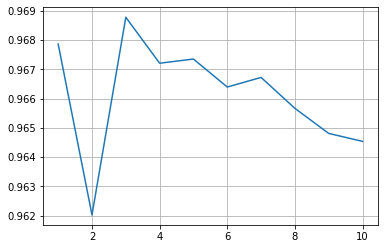

In [39]:
import matplotlib.pyplot as plt

y = []
for x in range(1,11):
    y.append(euclidean[x])

plt.grid()
plt.plot(range(1,11), y)

### cosine

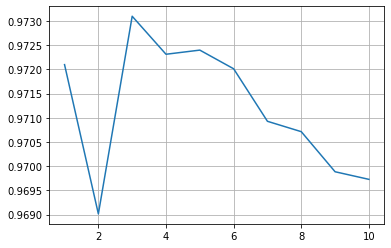

In [43]:
import matplotlib.pyplot as plt
from statistics import mean

y = []
for x in range(1,11):
    y.append(cosine[x])
    
plt.grid()
plt.plot(range(1,11), y)

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор (например, если у вас несколько наборов параметров с высоким качеством, обоснуйте как вы выберите среди этих наборов один).

   Наиболее оптимальными параметрами я считаю k=3 и metric='cosine'. На графиках видно, что этим параметрам соответствует наибольшая точность.


2. Какая метрика лучше себя показала в экспериментах? Можете ли вы объяснить, почему?

    Чуть лучше себя показала метрика cosine. Не могу объяснить.
    
   
2. Есть ли на графике зависимости точности от количества соседей "выбросы", резкие падения/повышения качества для одного значения k по сравнению с соседними? Если да, предположите причину появления этих выбросов.

    Есть явный выброс при k=2 - возможно из-за того, что алгоритм не взвешенный. Этот алгоритм подразумевает, что при равном числе ближайших соседей из одного и другого класса выбирается класс с наименьшей меткой, то есть выбор по сути рандомный. Такая ситуация возможна только при k%2 = 0. На графиках мы видим, что при точность всегда падает на чётном k, по сравнению с предыдущим нечётным. Но чем больше k, тем реже должны встречаться такие ситуации, ведь мы изначально подразумеваем, что похожие данные "кучкуются" в пространстве признаков, и возможны лишь одиночные(или близкие к этому) выбросы. В противном случае нет смысла использовать метрический алгоритм.
    
    Таким образом, самая низкая точность должна быть при минимальном чётном k, то есть при k=2.

### 3. Исследование зависимости точности взвешенного алгоритма на кросс-валидации (4 балла)

По результатам предыдущего эксперимента выберите метрику, которую вы будете использовать в этом эксперименте.

Оцените по кросс-валидации с 3 фолдами точность (долю правильно предсказанных ответов) взвешенного алгоритма k ближайших соседей в зависимости от количество соседей k (от 1 до 10).

Голос объекта положите равным `1 / (distance + eps)`, где `eps` = `1e-5`.

In [46]:
cosine = knn_cross_val_score(np.asarray(X), Y, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'accuracy', KFold(n_splits=3), algorithm = 'brute', metric='cosine', weights='distance')
for x in range(1, 11):
    cosine[x] = mean(cosine[x])
    
print(cosine)

{1: 0.9720999712135132, 2: 0.9720999712135132, 3: 0.9735999834588486, 4: 0.9740999801937931, 5: 0.9734857040709565, 6: 0.9736999812140235, 7: 0.9721856989684579, 8: 0.9724999848869506, 9: 0.9711999803966882, 10: 0.9711285606006154}


#### Нарисуйте график зависимости точности от количества соседей 

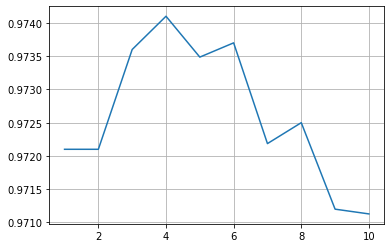

In [47]:
y = []
for x in range(1,11):
    y.append(cosine[x])
    
plt.grid()
plt.plot(range(1,11), y)

#### Ответьте на следующие вопросы

1. По результатам эксперимента, какие гиперпараметры вы считаете наиболее оптимальными? Обоснуйте свой выбор.

Наиболее оптимальными параметрами я считаю k=4 и metric='cosine'. На графиках видно, что этим параметрам соответствует наибольшая точность.


2. Сравните результаты взвешенного алгоритма с невзвешенным. Объясните разницу/отсутствие разницы в результатах.

Среднее качество алгоритма повысилось, так как учитывается не только принадлежность ближайшего соседа классу, но и расстояние до соседа.

Исчезла предпочтительность нечётных k, так как "спорные ситуации", о которых говорилось выше, стали практически невозможными. 

Исчез выброс при k=2 по той же причине. Алгоритм теперь менее чувствителен к выбросам в самих данных.

### 4. Применение алгоритма и интерпретация ошибок (3 балла)

1. Примените лучший алгоритм к исходной обучающей и тестовой выборке и посчитайте точность классификации. Сравните с точностью по кросс-валидации. Опишите ваши результаты.

In [8]:
from sklearn.metrics import accuracy_score as scorer

X_train, X_test, y_train, y_test = train_test_split(X, pd.to_numeric(Y), test_size = 0.16, random_state = 1)

knn_classifier_using_brute = BatchedKNNClassifier(4, 'brute', 'cosine', 'distance', batch_size = 5)
knn_classifier_using_brute.fit(X_train, y_train)
prediction = knn_classifier_using_brute.predict(X_test)
score = scorer(prediction, y_test)
print(score)

0.9776785714285714


Точность классифиации составила 0.977. Это чуть выше, чем на кросс-валидации (0.974)

2. Постройте и проанализируйте матрицу ошибок (confusion matrix), используйте функцию `sklearn.metrics.confusion_matrix`. Визуализируйте несколько объектов из тестовой выборки, на которых были допущены ошибки. Проанализируйте и укажите их общие черты.

In [9]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(prediction, y_test))

[[1085    0    3    1    1    2    3    1    4    1]
 [   1 1310    1    2    5    0    1    7    9    2]
 [   0    3 1131    6    0    0    0    2    1    1]
 [   0    1    2 1110    0   10    0    0    6    4]
 [   0    0    0    0 1023    3    0    0    3    6]
 [   1    0    0    6    0 1008    3    0    6    1]
 [   2    1    0    2    0   12 1037    0    3    1]
 [   0    2    7    6    4    0    0 1138    1    6]
 [   0    0    7   13    0    3    0    1 1018    4]
 [   0    1    1    7   34    5    0   13    5 1090]]


Видим, что наиболее частая ошибка - отнесение изображения цифры 4 к классу девятки. 

Вторая и третья по частоте ошибки - отнесение изображения цифры 7 к классу 9 и цифры 3 к классу 8.

Это довольно закономерные ошибки, так как прописное написание этих цифр похоже.

Пример идеальной классификации в обе стороны - цифры 2 и 4.
Цифры 2 и разу не была классифицирована как 4, и цифра 4 ни разу не была классифицирована как 2. 

Попробуем на примере выделить общие черты похожих объектов, на которых были допущены наиболее частые ошибки:

In [49]:
differences = []
for i in range(len(prediction)):
    if prediction[i]!=y_test[i]:
        differences.append(i)
                           
print(differences)

[36, 42, 63, 67, 142, 213, 242, 283, 332, 340, 358, 401, 422, 449, 454, 475, 502, 656, 701, 707, 721, 765, 801, 829, 839, 858, 959, 961, 1054, 1079, 1254, 1264, 1297, 1316, 1317, 1464, 1496, 1599, 1632, 1801, 1821, 1852, 1921, 1922, 1952, 1997, 2010, 2071, 2122, 2126, 2133, 2160, 2186, 2215, 2288, 2331, 2486, 2517, 2518, 2581, 2655, 2667, 2797, 2827, 2868, 2869, 2916, 2986, 3045, 3091, 3189, 3192, 3303, 3305, 3306, 3319, 3335, 3365, 3367, 3400, 3492, 3524, 3531, 3554, 3586, 3601, 3616, 3660, 3682, 3820, 3901, 3937, 3979, 3988, 4066, 4069, 4096, 4179, 4212, 4263, 4266, 4298, 4326, 4348, 4389, 4478, 4497, 4503, 4591, 4593, 4605, 4713, 4726, 4757, 4850, 4855, 4906, 4916, 4967, 4973, 5153, 5178, 5241, 5278, 5319, 5416, 5454, 5475, 5486, 5496, 5581, 5639, 5678, 5688, 5697, 5763, 5765, 5980, 5983, 6005, 6025, 6037, 6164, 6199, 6297, 6307, 6318, 6326, 6508, 6550, 6629, 6640, 6647, 6759, 6841, 6947, 7004, 7028, 7074, 7114, 7162, 7218, 7329, 7333, 7367, 7403, 7462, 7509, 7524, 7535, 7538, 7596,

Визуализируем ошибочные объекты:

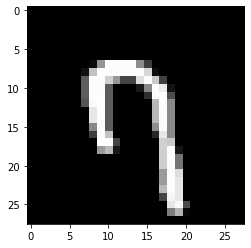

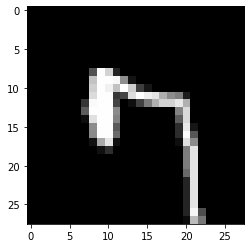

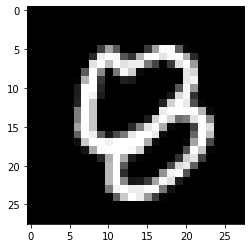

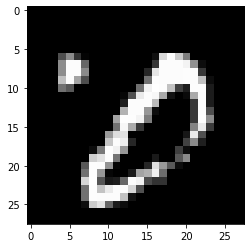

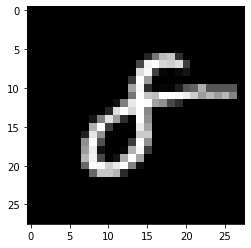

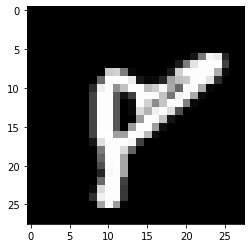

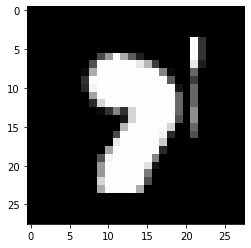

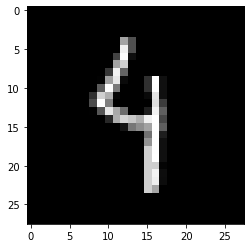

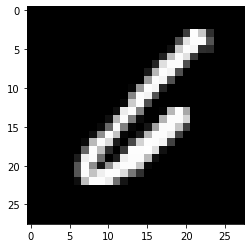

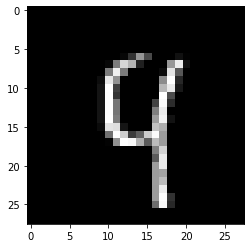

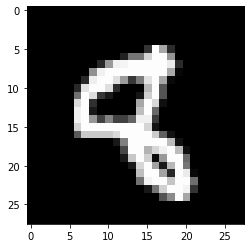

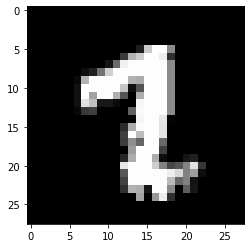

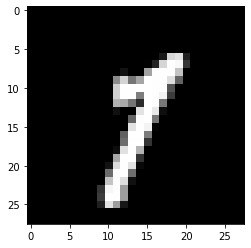

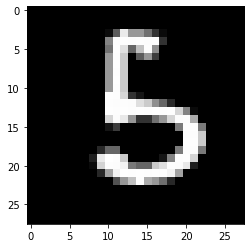

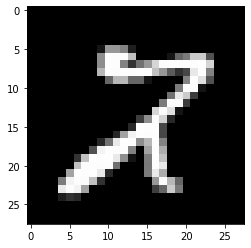

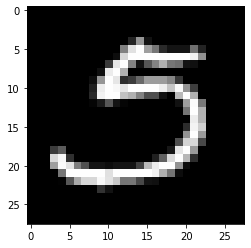

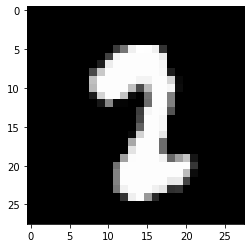

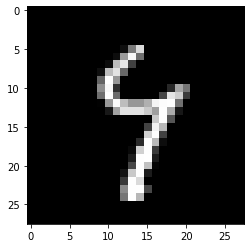

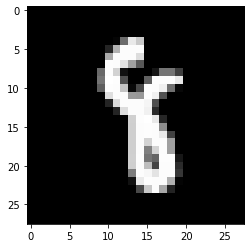

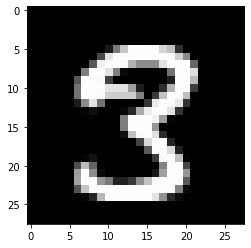

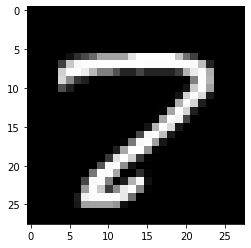

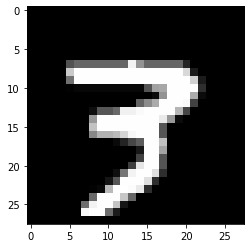

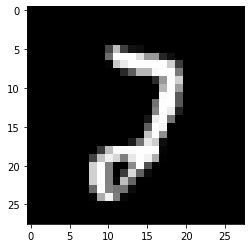

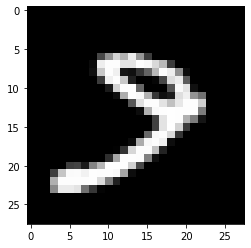

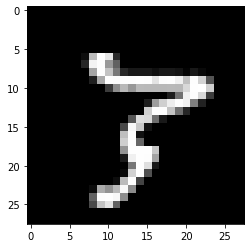

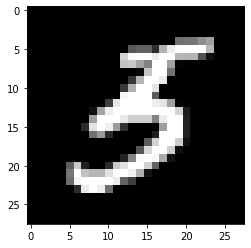

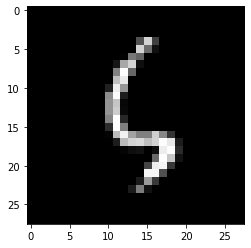

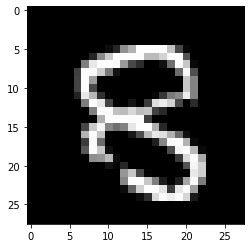

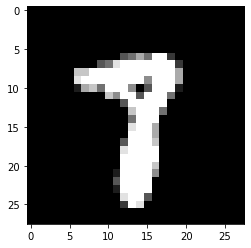

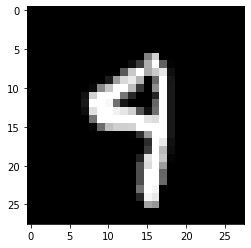

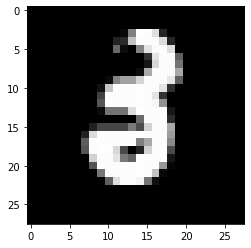

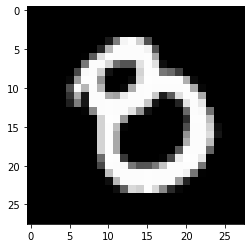

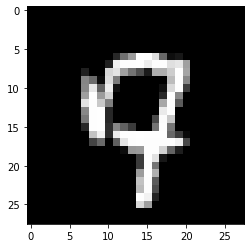

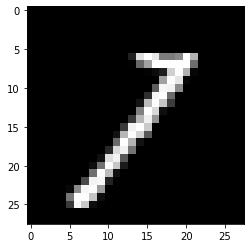

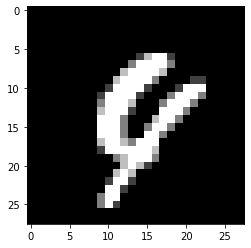

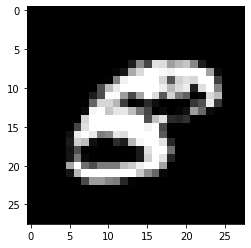

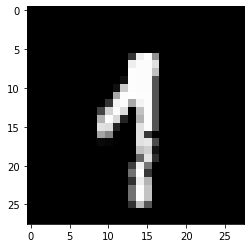

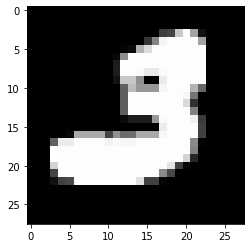

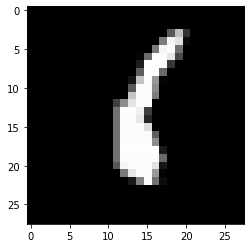

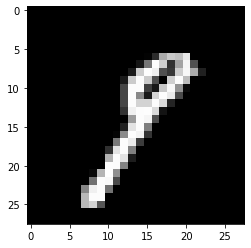

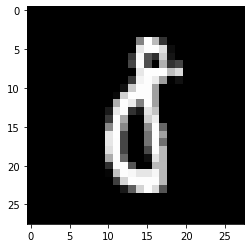

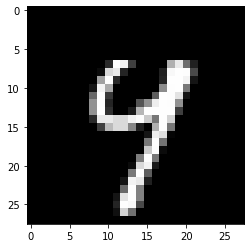

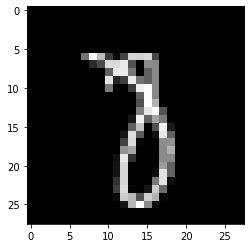

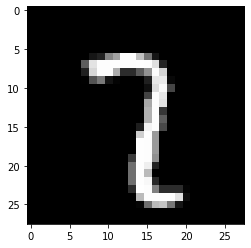

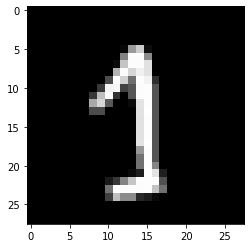

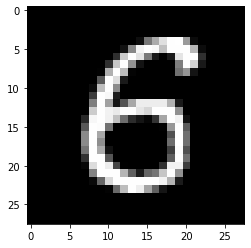

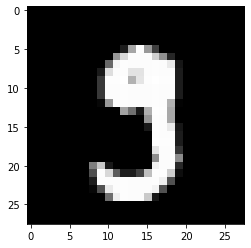

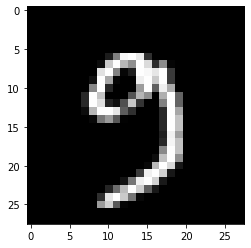

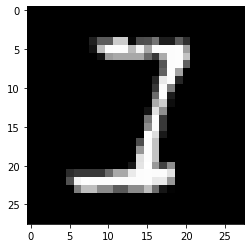

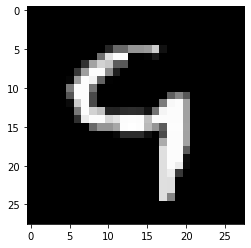

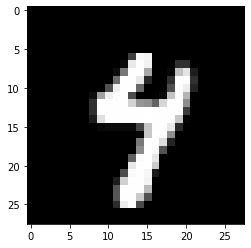

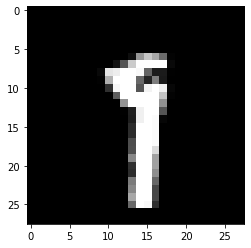

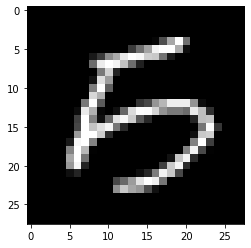

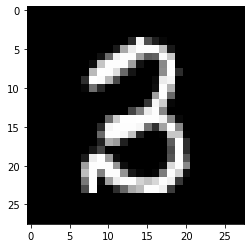

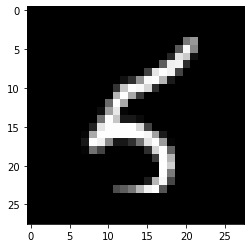

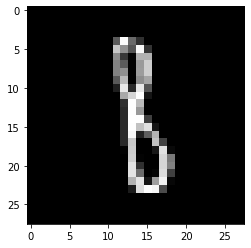

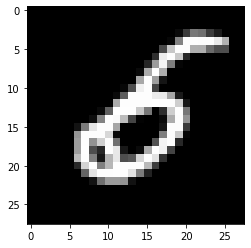

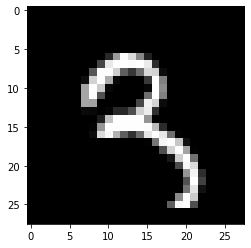

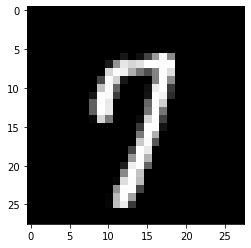

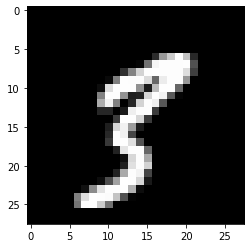

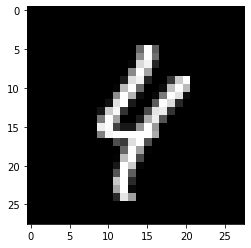

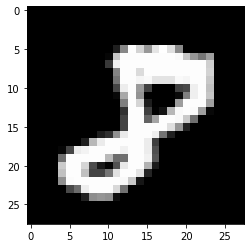

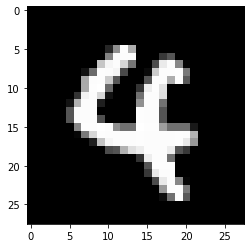

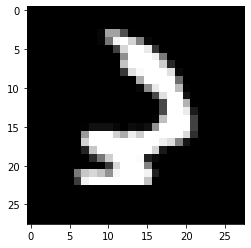

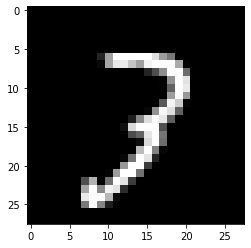

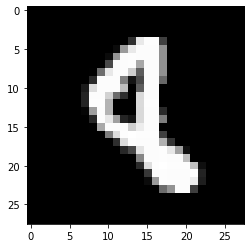

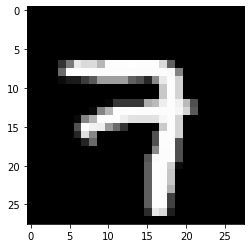

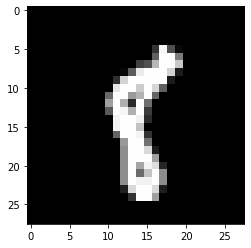

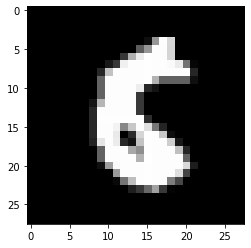

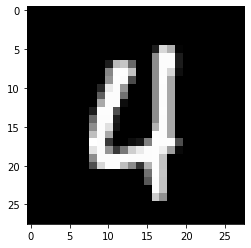

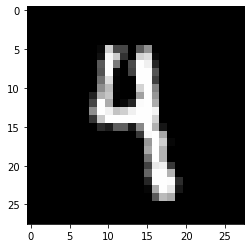

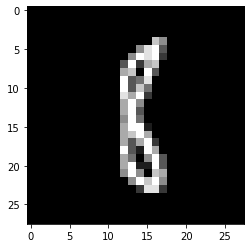

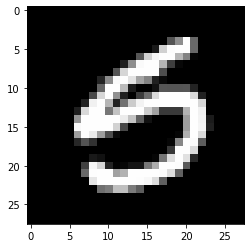

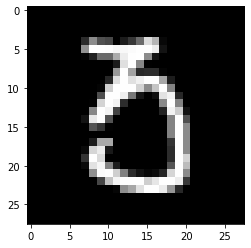

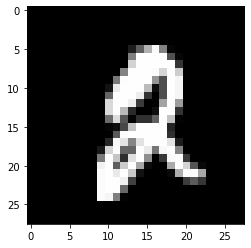

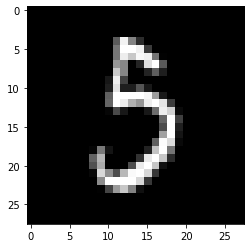

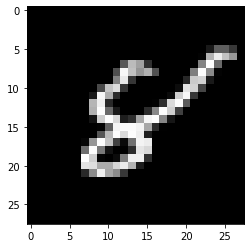

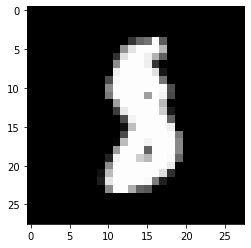

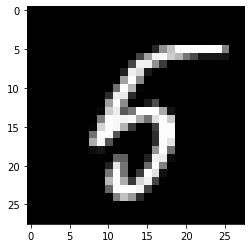

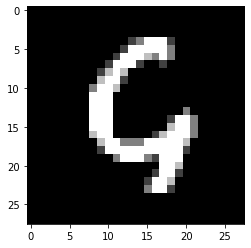

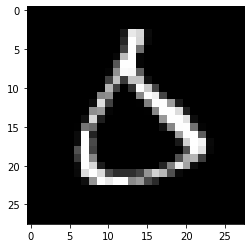

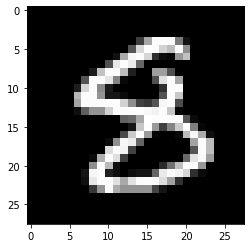

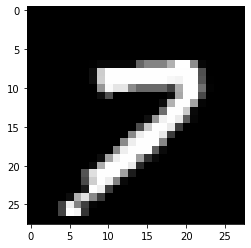

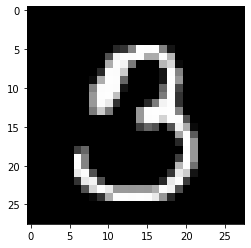

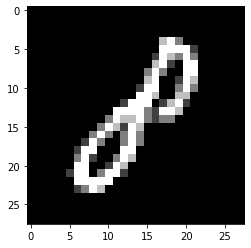

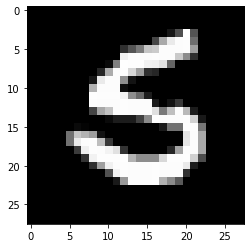

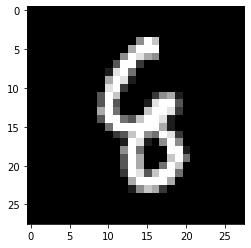

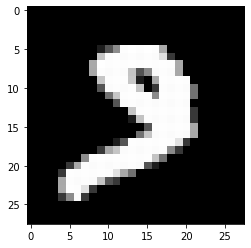

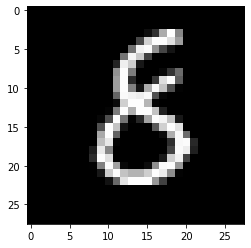

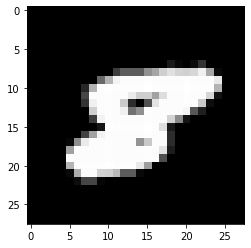

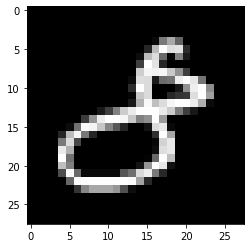

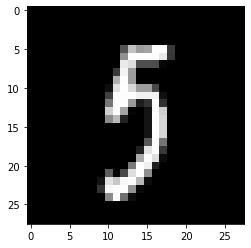

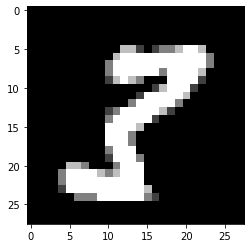

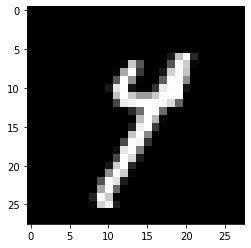

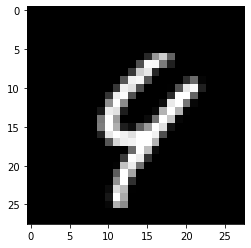

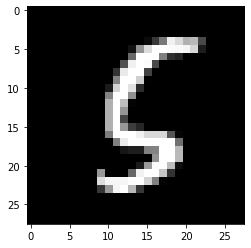

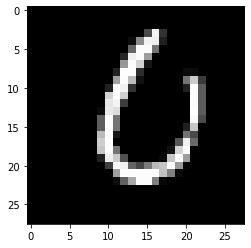

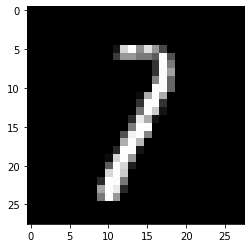

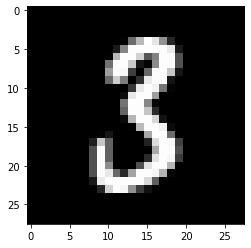

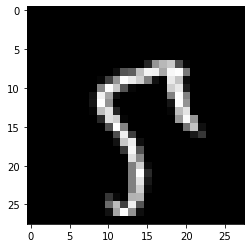

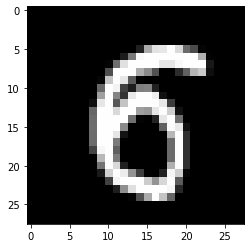

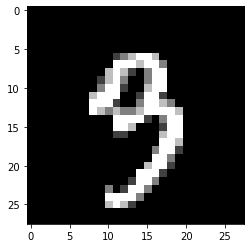

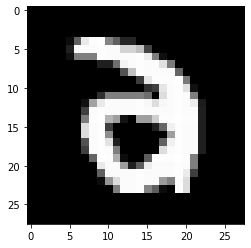

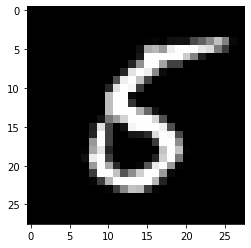

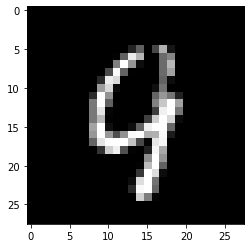

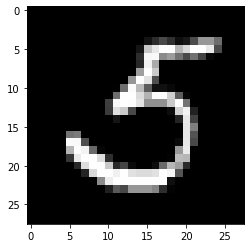

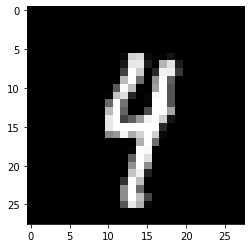

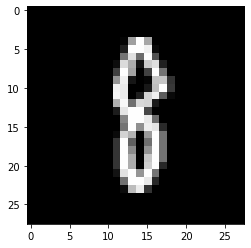

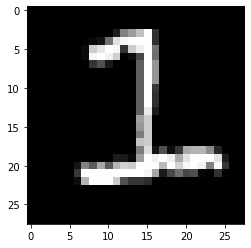

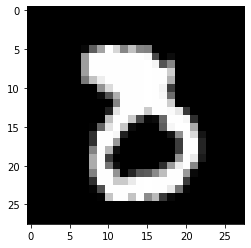

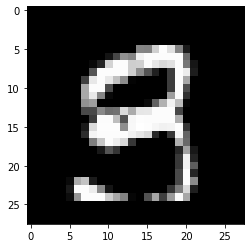

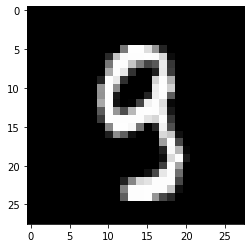

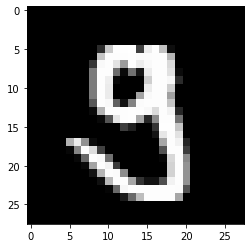

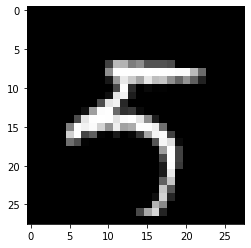

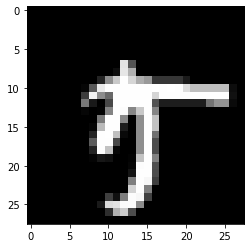

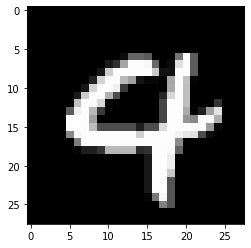

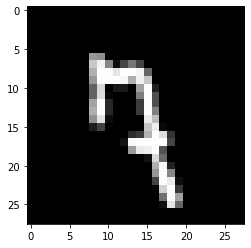

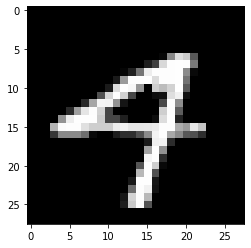

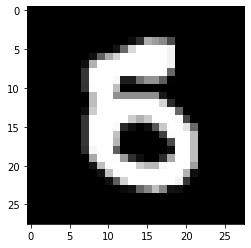

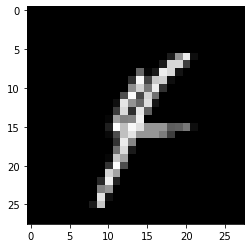

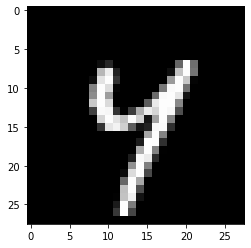

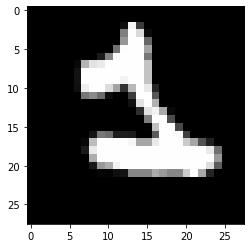

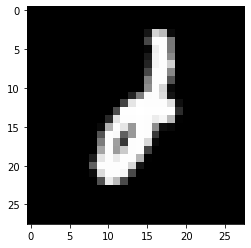

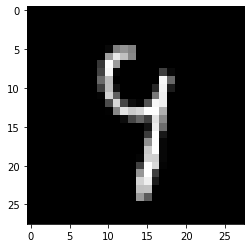

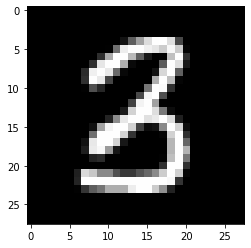

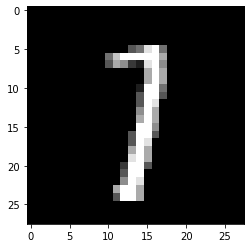

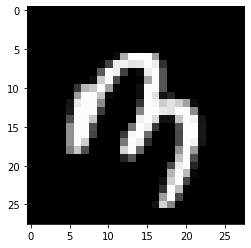

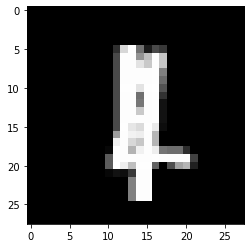

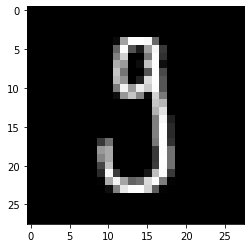

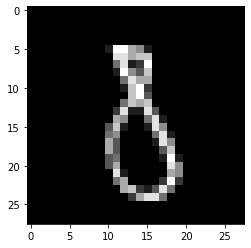

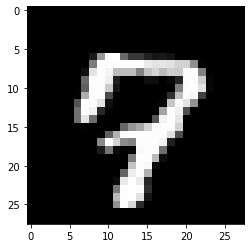

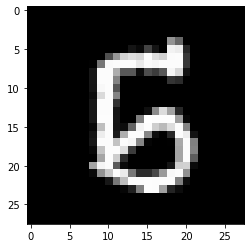

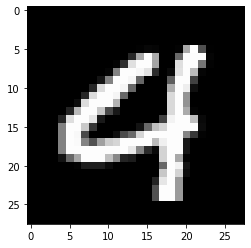

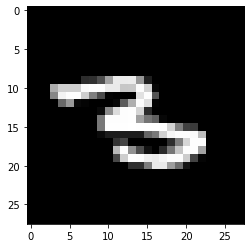

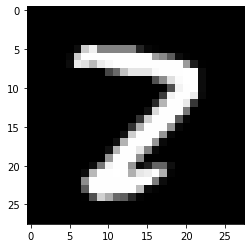

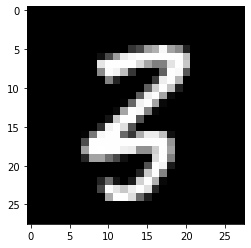

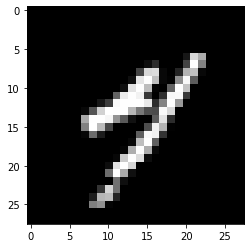

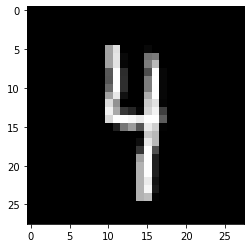

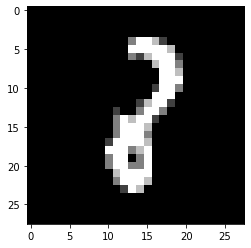

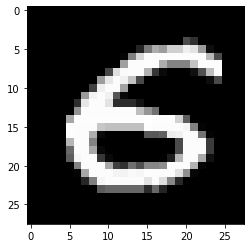

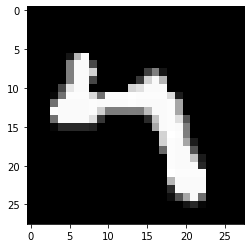

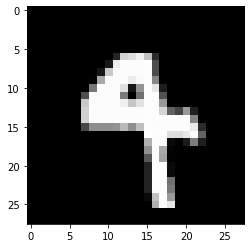

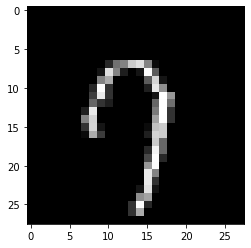

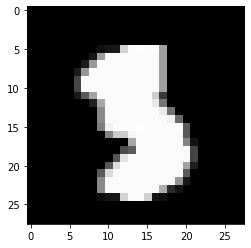

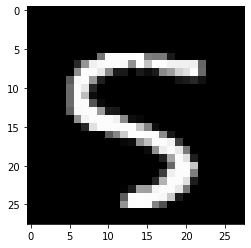

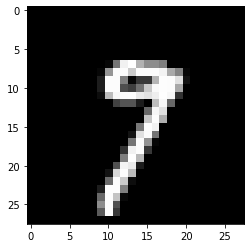

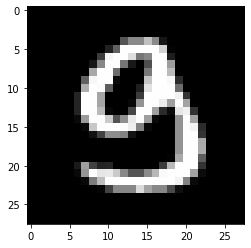

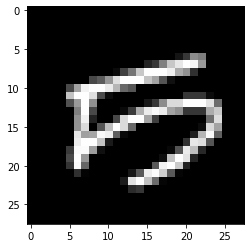

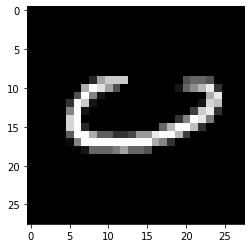

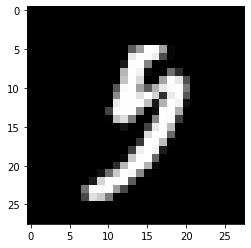

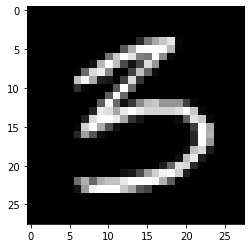

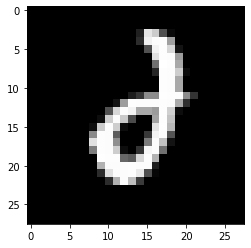

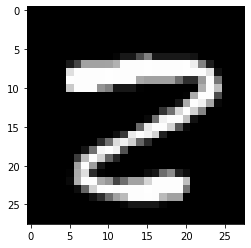

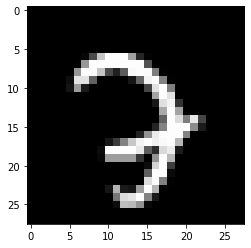

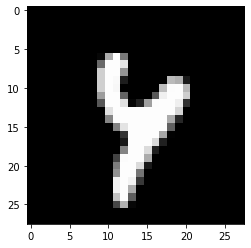

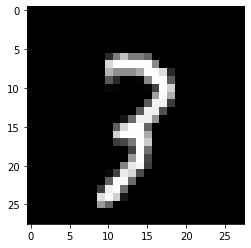

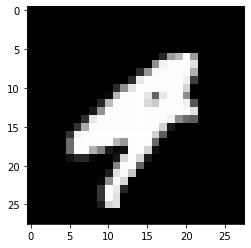

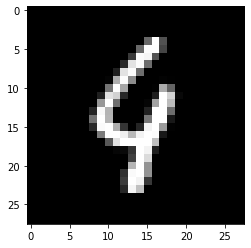

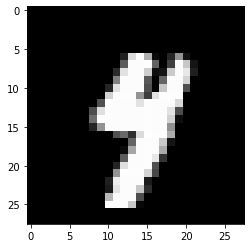

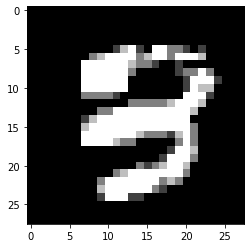

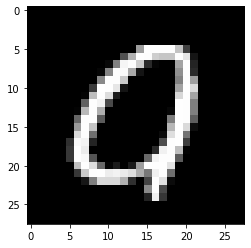

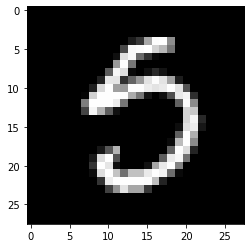

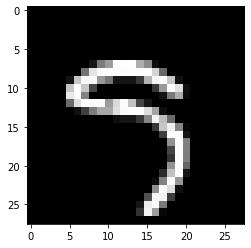

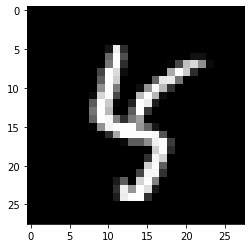

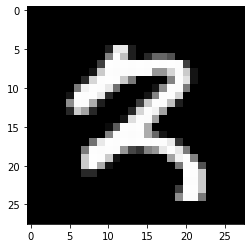

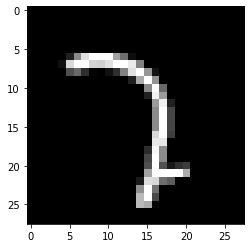

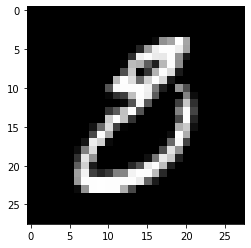

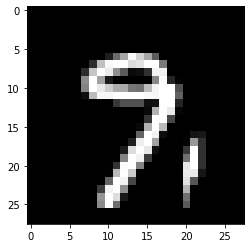

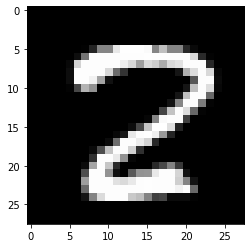

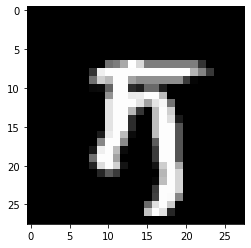

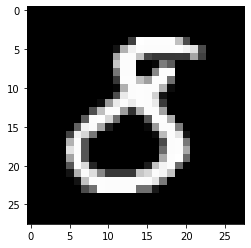

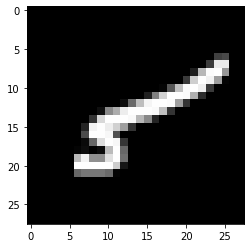

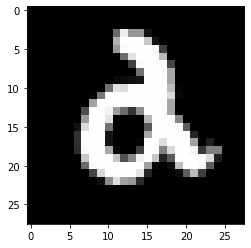

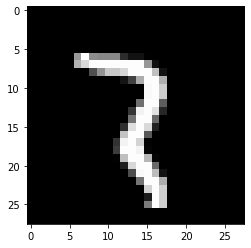

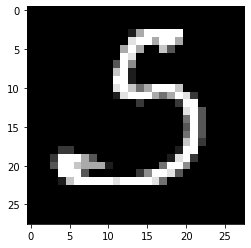

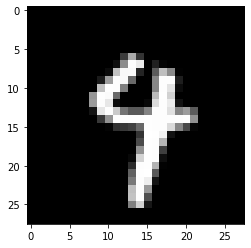

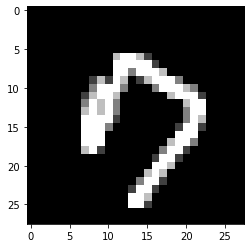

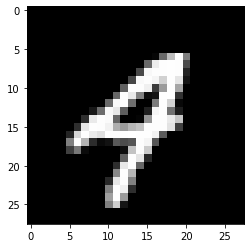

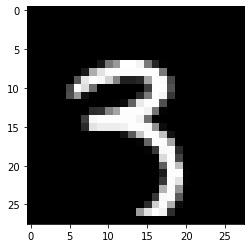

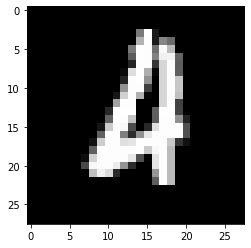

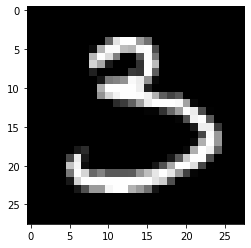

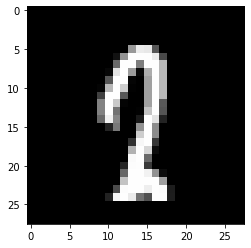

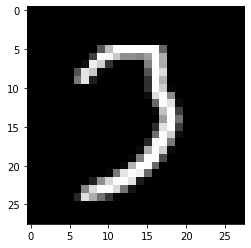

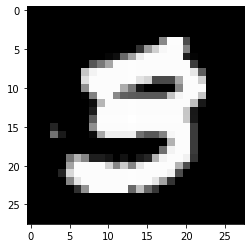

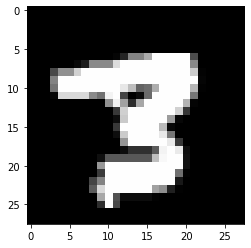

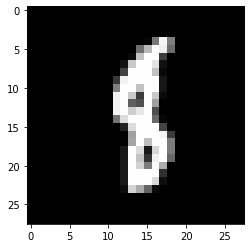

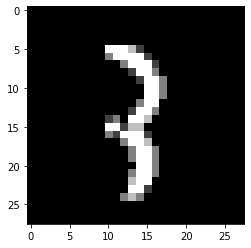

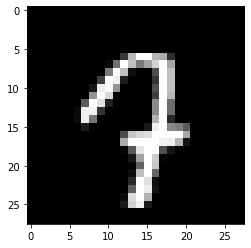

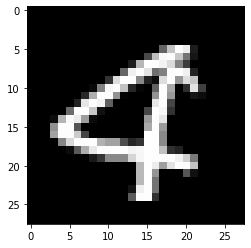

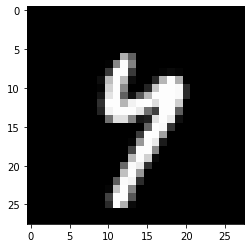

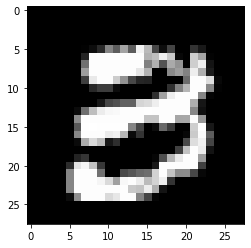

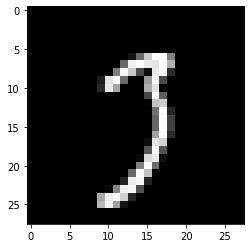

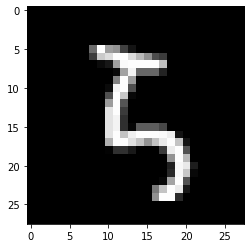

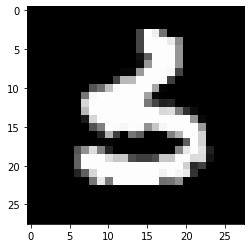

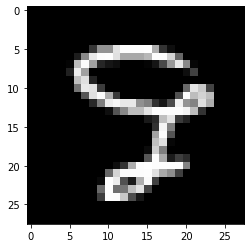

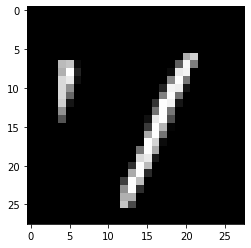

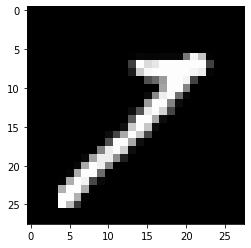

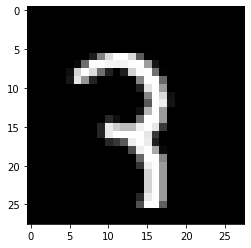

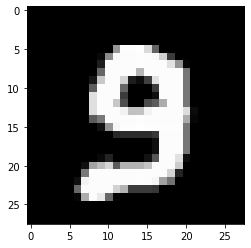

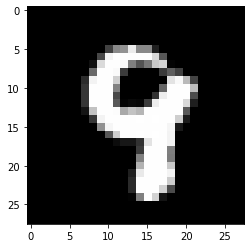

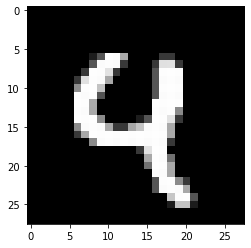

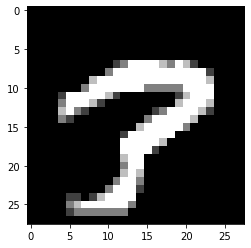

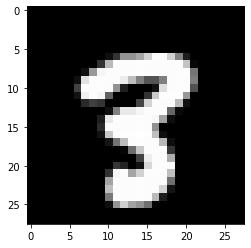

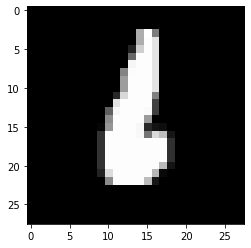

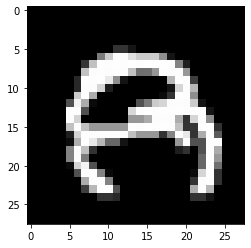

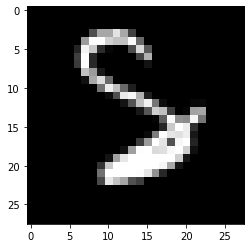

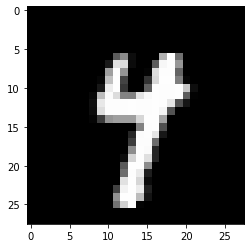

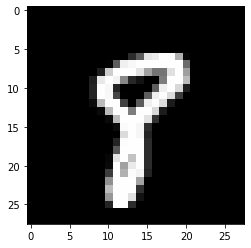

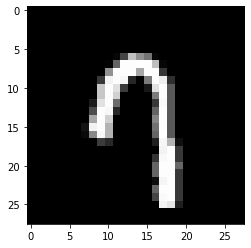

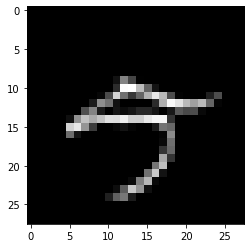

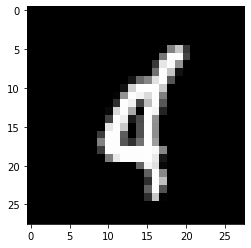

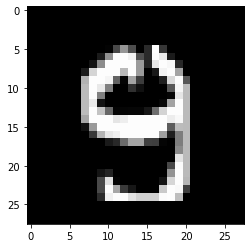

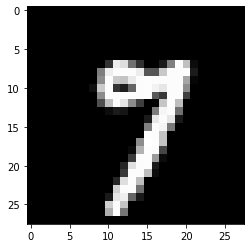

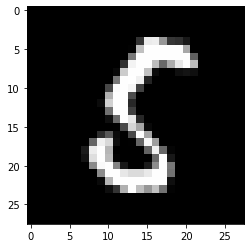

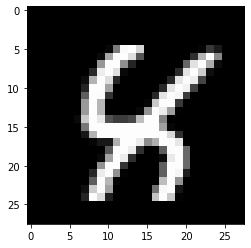

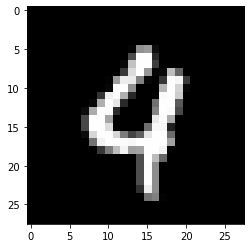

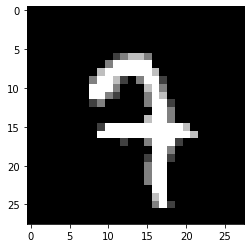

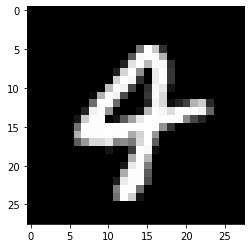

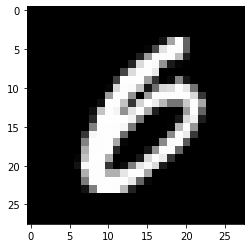

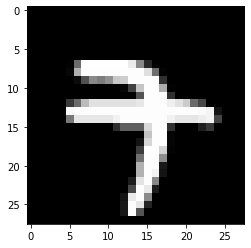

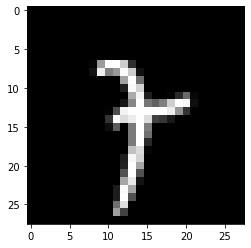

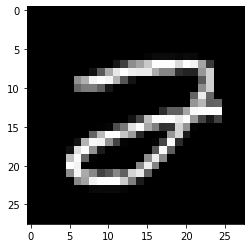

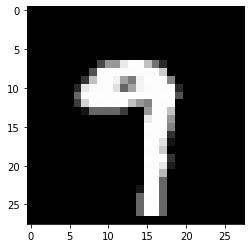

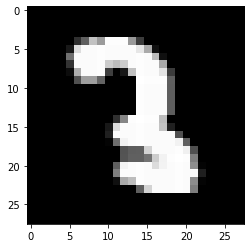

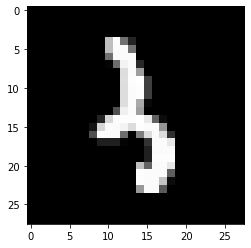

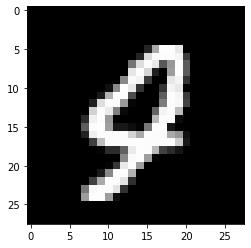

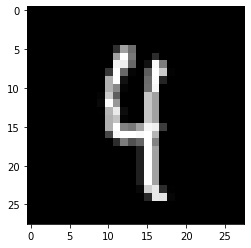

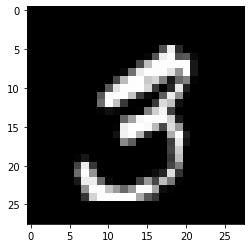

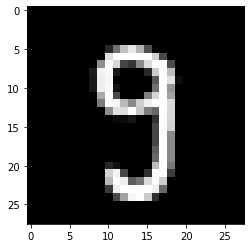

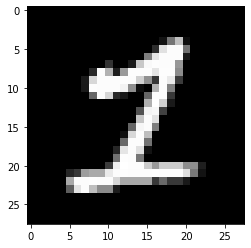

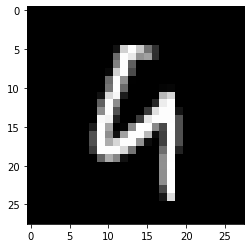

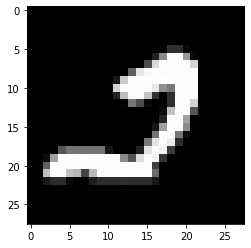

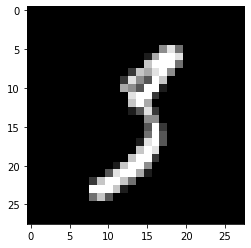

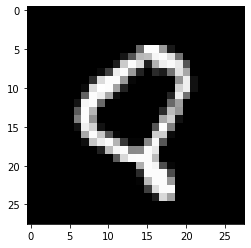

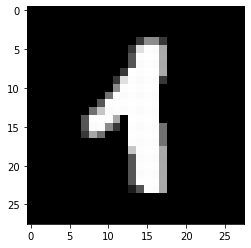

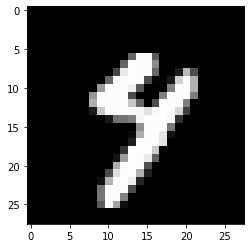

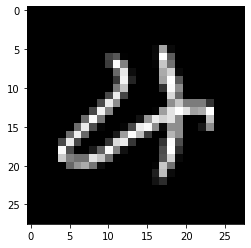

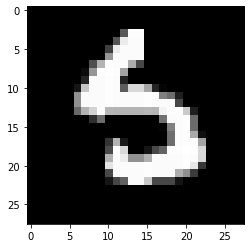

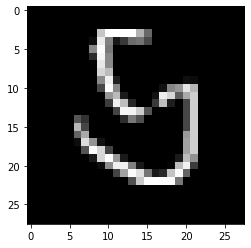

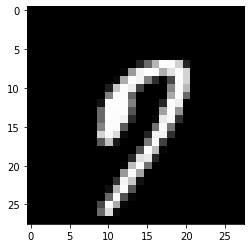

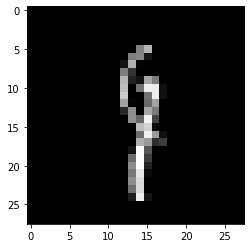

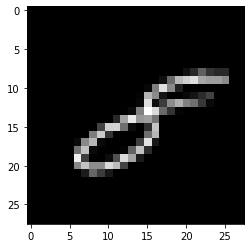

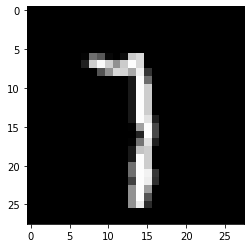

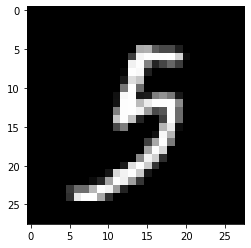

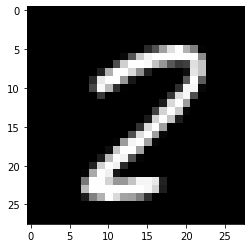

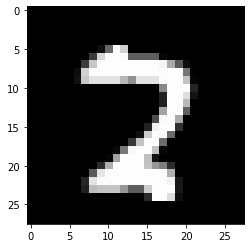

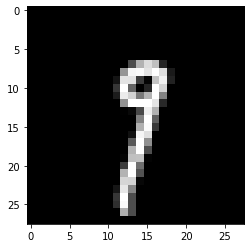

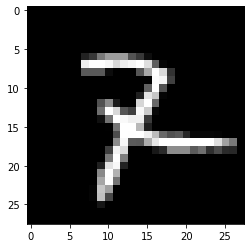

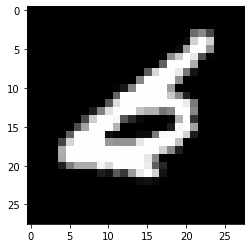

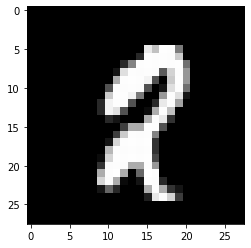

In [51]:
for x in differences:
    obj = np.asarray(X_test, dtype='uint8')[x:x+1].reshape((28,28))
    plt.imshow(obj, cmap='gray')
    plt.show()

## Бонус 1. Размножение обучающей выборки (3 балла)

Размножьте обучающую выборку с помощью поворотов, смещений, применений гауссовского фильтра и морфологических операций. Разрешается использовать библиотеки для работы с изображениями. Подобрать по кросс-валидации с 3 фолдами параметры преобразований. Рассмотреть следующие параметры для преобразований и их комбинации:
1. Величина поворота: 5, 10, 15 (в каждую из двух сторон)
2. Величина смещения: 1, 2, 3 пикселя (по каждой из двух размерностей)
3. Дисперсия фильтра Гаусса: 0.5, 1, 1.5
4. Морфологические операции: эрозия, дилатация, открытие, закрытие с ядром 2

Проанализируйте, как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

**Замечание.** Не обязательно хранить все обучающие выборки в процессе эксперимента. Достаточно вычислить ближайших соседей по каждой из выборок, а затем выбрать из них ближайших соседей.

**Замечание по дизайну эксперимента**. В этой части вам предлагается самим выбрать дизайн эксперимента. Перебор всевоможных комбинаций преобразований может быть затруднительным, в то время как жадный выбор преобразований уже даст улучшение в качестве.

In [ ]:
## your code here ##

## Бонус 2. Размножение тестовой выборки (2 балла)

Реализуйте предложенный на семинаре алгоритм, основанный на преобразовании объектов тестовой выборки.
Проверьте то же самое множество параметров, что и в предыдущем пункте.

Проанализируйте как изменилась матрица ошибок, какие ошибки алгоритма помогает исправить каждое
преобразование.

In [ ]:
## your code here ##

## Бонус 3. Сравнение подходов (1 балл)

Если вы реализовали оба подхода, сравните их между собой.

1. Какой подход даёт больший выигрыш в качестве и почему?

    *ваш ответ*
    

2. Есть ли какие-то преимущества у худшего по качеству подхода по сравнению с лучшим?

    *ваш ответ*